In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# import sklearn tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# import sklearn models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Understanding the Data

In [6]:
df = pd.read_csv("laptopPrice.csv")

In [7]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [9]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

# Exploritory Data Visualisation

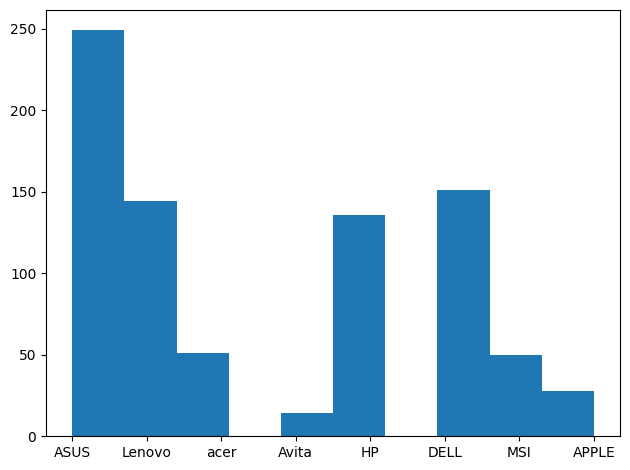

In [10]:
plt.hist("brand", data=df)    
plt.tight_layout()

- Asus seems to have the highest percentage of market share with Lenovo, Hp and Dell being next and close
- Apple's market share is surprisingly low

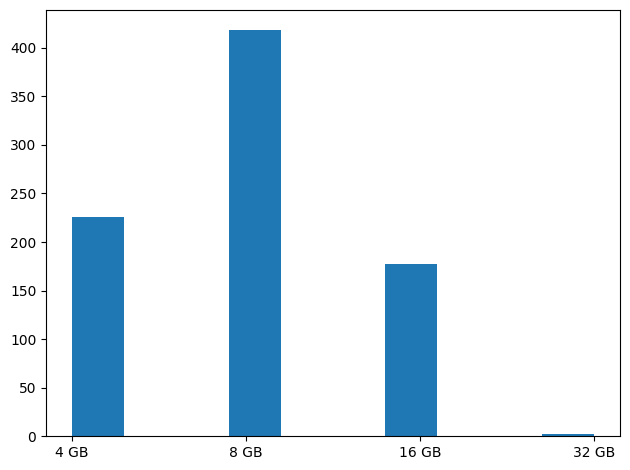

In [11]:
plt.hist("ram_gb", data=df)    
plt.tight_layout()

- 8GB ram devices are easily the most popular but 4GB and 16GB devices have their place
- 32GB devices are extremely rare and seem to be an enthusiast pick

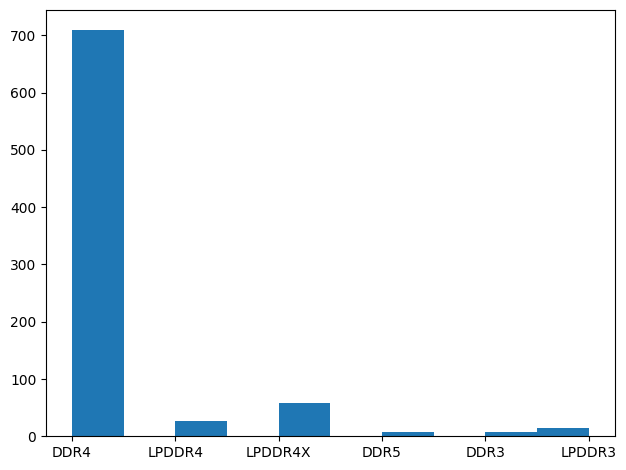

In [12]:
plt.hist("ram_type", data=df)    
plt.tight_layout()

- almost all devices use DDR4, would be interesting to find out the reason for lack of variety

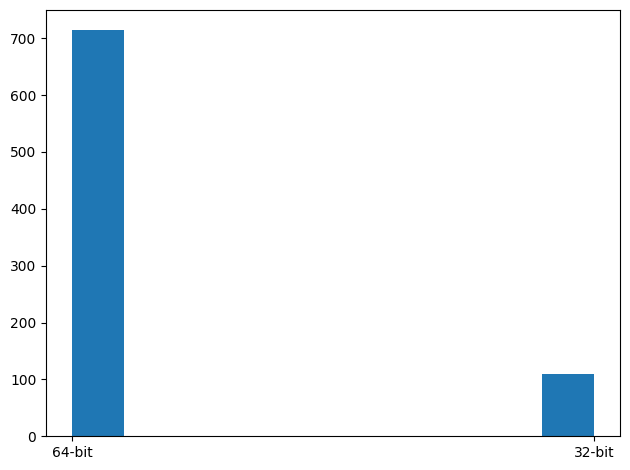

In [13]:
plt.hist("os_bit", data=df)    
plt.tight_layout()

- as expected, the majority of laptops use a 64-bit cpu architecture

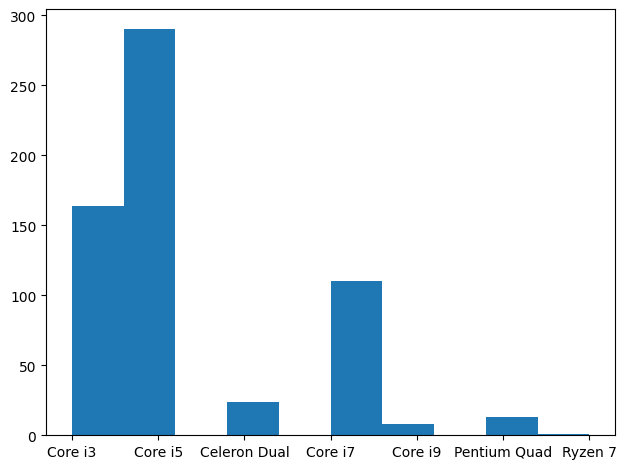

In [14]:
plt.hist("processor_name", data=df[df["processor_brand"] == "Intel"])    
plt.tight_layout()

- among intel devices, the Core i5 seems to be the standard choice. it would seem most people do not want to go for the lowest option i3
- Core i7 definetly seems quite popular and doesn't seem as much for enthusiasts as I expected
- Core i9 devices are almost non-existent, they definitely are the for enthusiasts

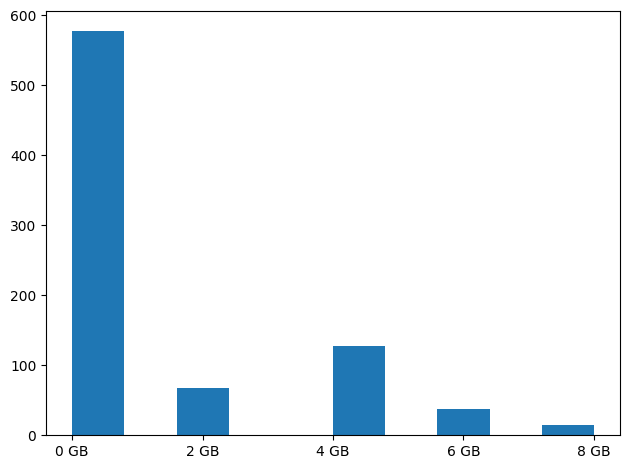

In [15]:
plt.hist("graphic_card_gb", data=df)    
plt.tight_layout()

- Most devices simple do not have a graphics-card as GPU use for most people is minimal
- Among the devices that do have one, a similar pattern of the second being the most popular and then a steady drop off seen with the intel Core i series and Ram GB can be seen. 

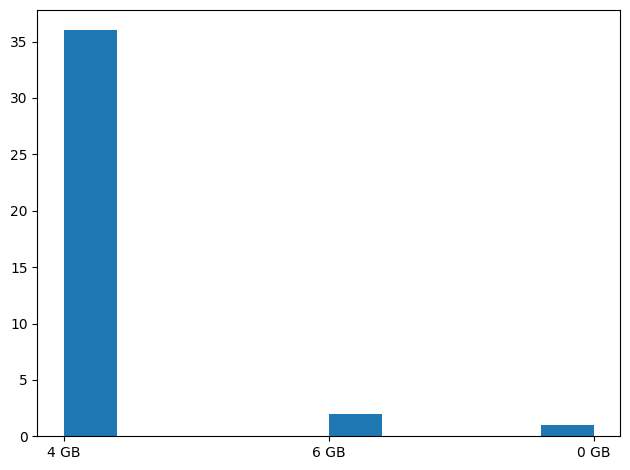

In [16]:
plt.hist("graphic_card_gb", data=df[df["weight"] == "Gaming"])    
plt.tight_layout()

- The graphics card story is definitely different with gaming laptops, with hardly any having no graphics card
- 4GB graphics cards seem to be the standard
- Interestingly enough, there are no laptops with 2GB graphics cards despite there being some with graphics card at all.
- even more bizzare is that none of the 8GB ram graphics cards belong to gaming laptops

# Model Selection

In [17]:
X = df.iloc[:, :15]
y = df.iloc[:, 15]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
model_list = [LinearRegression(), Lasso(max_iter=10000), Ridge(), SVR(tol=0.01), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),
              BaggingRegressor(), ExtraTreesRegressor(), ElasticNet(), AdaBoostRegressor(), GradientBoostingRegressor()]
cat_columns = ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice']

for model in model_list:
    cat_transformer = OneHotEncoder(drop="first")
    preprocessor = ColumnTransformer(transformers=[("cat", cat_transformer, cat_columns)])
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    
    print(f"Result for {model}", "\n")
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    mean_absolute_error_train = mean_absolute_error(y_train, y_train_pred)
    mean_absolute_error_test = mean_absolute_error(y_test, y_test_pred)
    
    root_mean_square_error_train = mean_squared_error(y_train, y_train_pred, squared=False)
    root_mean_square_error_test= mean_squared_error(y_test, y_test_pred, squared=False)
    
    r2_train = r2_score(y_train, y_train_pred) 
    r2_test = r2_score(y_test, y_test_pred) 

    print("Mean Absolute Errors")
    print(f"train: {mean_absolute_error_train} test: {mean_absolute_error_test}")

    print("Root Mean Squared Errors")
    print(f"train: {root_mean_square_error_train} test: {root_mean_square_error_test}")

    print("R-squared")
    print(f"train: {r2_train} test: {r2_test}")
    
    print("="*50)
    
    
    


Result for LinearRegression() 

Mean Absolute Errors
train: 11961.293724484376 test: 14536.38118941214
Root Mean Squared Errors
train: 18722.62245983773 test: 24645.8059351848
R-squared
train: 0.8285964566053627 test: 0.6945264742951867
Result for Lasso(max_iter=10000) 

Mean Absolute Errors
train: 11962.708894998907 test: 14486.280954595035
Root Mean Squared Errors
train: 18723.075002305977 test: 24562.04809496744
R-squared
train: 0.8285881705524664 test: 0.6965992266841199
Result for Ridge() 

Mean Absolute Errors
train: 12574.040474984346 test: 13836.626776508438
Root Mean Squared Errors
train: 20159.43512338055 test: 23088.29113131236
R-squared
train: 0.8012792792576396 test: 0.731915868074654
Result for SVR(tol=0.01) 

Mean Absolute Errors
train: 29562.247957526495 test: 29827.431263094968
Root Mean Squared Errors
train: 46842.794673130746 test: 46817.65558055983
R-squared
train: -0.07293158678125855 test: -0.10231788357746896
Result for KNeighborsRegressor() 

Mean Absolute Error

- The linear models seem to have the clear edge, with the tree models being able to get slightly worse results but overfitting to much to believe they could be improved by a Grid search. My guess for why this is the case is the very aggresive one-hot encoding used on the data set as it had no numerical features.
- The plain Decision tree Outperforms the Random Forest ensemble which probably isn't a good sign
- SVR is completely unuseable with this dataset
- Of the linear models, the Ridge seems to be the most promising as it has simultaneously the highest test R squared score and lowest training R squared score of the bunch showing high accuracy with minimal overfitting.
- For further investigation with Grid search, the following models will be chosen:
- Ridge because it's clearly the best
- Lasso because it's sort of promising. LinearRegression will be dropped because it seems to behave identically to the Lasso

In [20]:
second_gen_models = [Lasso(max_iter=10000,tol=0.01), Ridge()]
param_grid = {"alpha": np.array([1.0, 0.1, 0.01,])}
for model in second_gen_models:
    cat_transformer = OneHotEncoder(drop="first")
    preprocessor = ColumnTransformer(transformers=[("cat", cat_transformer, cat_columns)])
    new_X_train = preprocessor.fit_transform(X_train)
    new_X_test = preprocessor.transform(X_test)
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(new_X_train, y_train)
    print(model)
    
    new_y_train_pred = grid.best_estimator_.predict(new_X_train)
    new_y_test_pred = grid.best_estimator_.predict(new_X_test)
    
    mean_absolute_error_train = mean_absolute_error(y_train, new_y_train_pred)
    mean_absolute_error_test = mean_absolute_error(y_test, y_test_pred)
    
    root_mean_square_error_train = mean_squared_error(y_train, new_y_train_pred, squared=False)
    root_mean_square_error_test= mean_squared_error(y_test, new_y_test_pred, squared=False)
    
    r2_train = r2_score(y_train, new_y_train_pred) 
    r2_test = r2_score(y_test, new_y_test_pred)

    print("Mean Absolute Errors")
    print(f"train: {mean_absolute_error_train} test: {mean_absolute_error_test}")

    print("Root Mean Squared Errors")
    print(f"train: {root_mean_square_error_train} test: {root_mean_square_error_test}")

    print("R-squared")
    print(f"train: {r2_train} test: {r2_test}")
    print(grid.best_estimator_.alpha)
    print(grid.best_estimator_.tol)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53587498325.883255, tolerance: 10671080194.177158
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48953749138.52208, tolerance: 10532003995.248924
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46511915580.12914, tolerance: 9978887145.229494
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\USER\AppData\Roaming\P

Lasso(max_iter=10000, tol=0.01)
Mean Absolute Errors
train: 11962.553578887066 test: 13252.73872154084
Root Mean Squared Errors
train: 18723.003599782423 test: 24566.716413704744
R-squared
train: 0.8285894779460276 test: 0.696483885641801
1.0
0.01
Ridge()
Mean Absolute Errors
train: 12574.040474984346 test: 13252.73872154084
Root Mean Squared Errors
train: 20159.43512338055 test: 23088.29113131236
R-squared
train: 0.8012792792576396 test: 0.731915868074654
1.0
0.0001


- couldn't for the life of me get Lasso to converge for some reason and the Grid search didnt seem to do much for the Ridge anyways